# **실습 4. BoW 모델 직접 구현해보기**

## **1. 말뭉치(corpus)내의 모든 구두점 삭제하기**

이번 실습에서는 이론 문서에서 간략히 만났던 BoW를 파이썬을 통해 구현해볼 것이다. 본격적인 시작 전, 문자열 내 구두점 구두점을 영어로 'punctuation'이라고 한다. 앞으로 코드에서도 자주 등장하는 단어이니 기억해두자.
 제거 작업이 우선되어야 한다. 과연 효율적인 방법은 없을까? 이하 두 가지의 힌트를 활용한 두 가지의 방법을 제시하겠다.

 >힌트1. 파이썬 string 모듈 사용하기
: string 모듈 내의 ‘punctuation’ 메서드를 사용하면, 간단하게 모든 구두점을 꺼내쓸 수 있다.  
```
import string
>>> string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
```  
>힌트2. 반복문 활용 < 파이썬 정규 표현식 사용하기  
: 파이썬 정규표현식(regular expressions)은 'regex'나 're'로 생략하여 호출할 수 있다. 정규표현식의 규칙은 구글링을 통해 익히도록 하자.



>방법1 : string모듈 & 반복문 활용
import string
for p in string.punctuation:
    corpus = corpus.replace(p, "")   

>방법2(추천) : string모듈 & 파이썬 정규표현식 활용


```
import re, string
punc_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))

def strip_punc(corpus):
    """ 문자열 내 포함된 모든 구두점을 제거.
    매개변수
    ----------
    corpus : str

    반환 값
    -------
    str
        모든 구두점이 제거된 말뭉치"""
    return punc_regex.sub(‘’, corpus)
 >>> strip_punc("moo. meow! cat? cow~")
'moo meow cat cow'
```





## **2. TF descriptor 계산하기**

‘용어-빈도 설명자(Term-Frequency descriptor)’란 문서 내의 단어의 빈도를 설명해주는 값이다. 편의를 위해 한글 표현 대신 TF descriptor라 통일하여 부르겠다. 지금부터는 문서 당 TF descriptor를 계산해볼 것인데, 하나의 문서에 대한 TF-descriptor를 계산하는 방법은 이하 네 단계로 요약될 수 있다.

①구두점 제거 → ②소문자화 → ③토큰화 → ④개수 세기

여기서 ‘토큰화(Tokenization)’란, 말뭉치를 토큰(token), 즉 의미 있는 분석 단위로 쪼개어 나타내는 작업을 의미한다. 토큰화의 결과물은 각 단어가 포함된 리스트 혹은 튜플의 형태가 되어야 한다. 이제 간단한 예시를 통해 TF descriptor를 계산하는 과정을 구체적으로 이해해보자. 아래 input 문장에서 각 단어의 구두점과 소문자를 제거한 후 토큰 단위로 쪼개면 이하의 결과를 얻을 수 있다.



```
Input document:
"Apples rule. Apples are the best. Truly, they are. Truly... Truly"

Document -> remove punctuation and lowercase -> tokenize:
['apples',
 'rule',
 'apples',
 'are',
 'the',
 'best',
 'truly',
 'they',
 'are',
 'truly',
 'truly']

```
이번에는 문서에 대한 TF descriptor를 만들어보겠다. TF descriptor는 문서를 구성하는 토큰이 발생하는 횟수를 알파벳 순서대로 나타내어 준다. 이때 토큰의 첫 알파벳을 기준으로 정렬이 이루어진다. 예를 들면, "Bad apple seed. Bad apple."의 문서에 대한 TF-descriptor 결과물은 아래와 같은 3차원 배열 array([2., 2., 1.])이 될 것이다. 이때 실수가 아닌 정수(ints)로 구성되도록 한다.  


```
index proceeds in alphabetical order
    ------------------------------------
    tf[0] -> count of "apple" = 2
    tf[1] -> count of "bad" = 2
    tf[2] -> count of "seed" = 1
"Bad apple seed. Bad apple." -> array([2., 2., 1.])
```
유의할 것은, BoW 모델에서는 단순히 ‘apple이 한 번이라도 발생하였다’는 사실을 넘어서 ‘apple이 2번 나타났다’라는 횟수 정보가 중요하다는 점이다. 따라서 단어들 간 중복이 허용되므로, 예시의 단어가방은 {'apple', 'apple', 'bad', 'bad', 'seed'}로 표현될 것이다. 

이번에는 여러분이 이하 문서에 대한 TF-descriptor를 직접 구해보도록 하자.  
doc = "Apples rule. Apples are the best. Truly, they are. Truly... Truly"  

- input으로 문자열 형식과 같은 document를 받음.
- 딕셔너리를 행렬로 변환할 것.
- 이때 각 단어는 알파벳순으로 정렬되어야 함. (sorted 사용하면 '정렬'된 '행렬'이 됨.)
- descriptor은 따로 np.array 사용해야 함.
- counter 값은 정수(ints)가 아닌(floats)형태 (dytpe 지정)

>힌트1: 코드 작성의 순서는 이하와 같다.  
문서 내 구두점 제거 → 소문자화 → 토큰화 → collections 모듈의 Counter 클래스를 활용하여 각 토큰에 대한 counter 생성 → numpy의 array를 활용하여 각 토큰의 개수를 나타내는 descriptor 배열 생성

>힌트2: Counter 클래스는 딕셔너리를 반환하므로 인덱스를 활용하면 descriptor 산출에 유용할 것이며, 이때 sorted 함수를 활용하여 각 토큰을 알파벳 순으로 정렬한 후 descriptor 값을 산출해야 한다.  

위의 힌트를 바탕으로 코드를 정확히 작성하였다면 아래와 같은 결과가 나올 것이다.


```
print(sorted(counter))
>>> ['apples', 'are', 'best', 'rule', 'the', 'they', 'truly']
print(descriptor)
>>> [2. 2. 1. 1. 1. 1. 3.]
```




In [ ]:
# 여기에 코드 작성

## **3. BoW 활용하여 여러 문서의 TF 계산하기**

지금까지는 하나의 문서에 대해 TF를 계산하였다. 지금부터는 여러 문서에 대해 BoW 모델을 적용해볼 것이다. 이하 두 개의 문서가 있다고 해보자:  
doc_1 = "I am a dog."  
doc_2 = "I am a cat!"  

만약 우리가 이 두 문서에 대한 TF descriptor를 만들기 위해 이전의 섹션에서 활용한 코드를 쓴다면, 아마 이하와 같은 결과를 얻을 것이다.  
"I am a dog." -> array([1., 1., 1., 1.])  
"I am a cat!" -> array([1., 1., 1., 1.])  

그런데 무언가 어색하지 않은가? 결과를 보면, 두 문장의 의미는 서로 다름에도 불구하고 동일한 TF descriptor를 공유하고 있다. 두 문장이 각자의 단어 가방을 바탕으로 TF descriptor을 계산했기 때문에, 문장 간 비교가 불가능해진 것이다. 비교를 위해서는 하나의 통일된 비교 기준이 필요하다. 이에 따라, 우리는 하나로 통일된 단어 사전을 별도로 만들어 이를 바탕으로 doc_1과 doc_2의 TF descriptor를 계산해볼 것이다. 지금부터는 이 통합된 단어 사전 리스트를 ‘vocabulary’라고 지칭하겠다.  

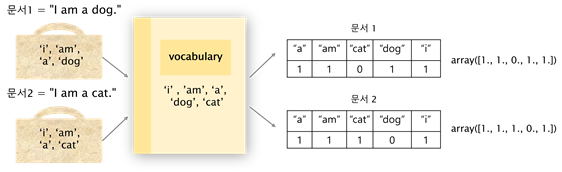



```
index proceeds in alphabetical order
    ------------------------------------
    tf[0] -> count of "a"
    tf[1] -> count of "am"
    tf[2] -> count of "cat"
    tf[3] -> count of "dog"
    tf[4] -> count of "I"

"I am a dog." -> array([1., 1., 0., 1., 1.])
"I am a cat!" -> array([1., 1., 1., 0., 1.])
```

지금까지 여러 문서에 대한 TF-descriptor 산출 방식까지 이해해보았다. 지금부터는 본격적으로 여러 문서에 대한 TF-descriptor을 산출하는 코드를 직접 짜볼 것이다. 

우선적으로 함수는 세 개를 만들어야 한다.  
① to_counter: 문서 내 각 단어의 개수(word count)를 구하는 함수  
② to_vocab: 여러 문서에 대한 통합된 vocabulary를 만드는 함수  
③ to_tf: 단어별 빈도를 계산하는 함수  

>첫째, ‘to_counter' 함수를 만들어보자. 함수 내 코드 순서 및 조건은 이하와 같다. 

>1. 문서에서 모든 구두점을 제거
2. 소문자로 변환
3. 문서를 토큰화
4. 문서에 대한 <word -> count> 매핑을 반환 (<collections.Counter>을 사용할 것)


In [ ]:
def to_counter(doc):
    """ 
    각 문서의 word-count를 만드는 함수
    구두점 제거 이후 모든 글자를 소문자로 만들어야 함
    
    매개변수
    ----------
    doc : str
    
    반환 값
    -------
    collections.Counter
        lower-cased word -> count
    
    예시
    --------
    >>> to_counter("I am a dog.")
    Counter({'a': 1, 'am': 1, 'dog': 1, 'i': 1})
    """
# 여기에 코드 작성

이하의 결과가 나타나는지 직접 확인하라: 


```
>>> to_counter("I am a dog.")
Counter({'a': 1, 'am': 1, 'dog': 1, 'i': 1})
```



In [ ]:
# 여기에 코드 작성

>둘째, ‘to_vocab’ 함수를 만들어보자.  

> 우리는 to_counter을 통해 우리는 문서 각각에 대한 word-counter를 만들 수 있게 되었고, 이제는 to_vocab을 통해 전체 말뭉치에 대한 하나의 vocabulary를 리스트 형태로 만들 것이다. to_vocab은 여러 word-counter에 대한 이터러블(ex. 각 문서에 대한 단어 수의 리스트)을 입력받으면, 전체 단어를 알파벳 순으로 정렬한 후 그것을 리스트 형식으로 반환해줄 것이다.  
*Tip: 파이썬에 내장된 ’집합(set)‘ 객체를 사용하면, 시퀀스를 구성하는 각 요소를 중복 없이 가지고 올 수 있다.


In [ ]:
def to_vocab(counters):
    """ 
    입력: 여러 counter에 대한 이터러블
    반환: 모든 counter들에 걸쳐 축적된 단어를 중복 없이 정렬한 리스트
    
    [word_counter0, word_counter1, ...] -> sorted list of unique words
    
    매개변수
    ----------
    counters : Iterable[collections.Counter]
        각 문서의 {word -> count} 카운터들을 포함하는 하나의 이터러블
    
    반환 값
    -------
    List[str]
        `counters`에 포함된 단어를 중복 없이 알파벳 순으로 정렬한 하나의 리스트
    """
# 여기에 코드 작성

이하의 결과가 나타나는지 확인하라:  


```
>>> count1 = to_counter("I am a dog.")
>>> count2 = to_counter("I am a cat!")
>>> to_vocab([count1, count2])
['a', 'am', 'cat', 'dog', 'i']
```



In [ ]:
# 여기에 코드 작성

이제 우리가 갖게 된 것은 (1) 여러 문서의 word-counts, (2) 문서 전체에 대해 알파벳 순으로 정렬된 vocabulary 리스트이다. 이 둘을 활용하면 TF descriptors를 만들 수 있다! 

>셋째, ‘to_tf’ 함수를 만들어보자.  

>이 함수의 입력값은 앞선 두 함수를 통해 얻은 (1) 한 문서의 word-counts (Counter 인스턴스 형태) 및 (2) 문서 전체에 대한 vocabulary이다. 반환값은 해당 문서의 TF descriptor를 나타내는, 실수로 구성된 한 개의 행렬이다.   


만약 아직 보지 못한 key를 사용하는 counter를 입력 받으면 어떻게 될까? 무엇이 반환될까? 이 행동이 우리에게 유용한 것일까?


In [ ]:
# 여기에 코드 작성

최종적으로, 만든 함수 세 개를 모두 활용하여 여러 문서에 대한 descriptor들을 만들어보자.


---


doc_1 = "I am a dog."  
doc_2 = "I am a cat!"  
doc_3 = "I am not a dog"  
doc_4 = "I am not a cat, am I!?!"  

이 문서에 사용된 단어를 중복 없이 세어보면 총 6개이다(단어의 종류가 6가지라는 뜻이다). 따라서 여러분이 만든 vocabulary가 6의 길이를 가져야 하고, 이에 따라 각 문서의 TF descriptor 역시 길이가 6이어야 한다. <numpy.vstack>를 사용하여 이 네 개의 문서의  descriptor들에 대한 (4, 6)크기의 행렬을 생성하라.


In [ ]:
doc_1 = "I am a dog."
doc_2 = "I am a cat!"
doc_3 = "I am not a dog"
doc_4 = "I am not a cat, am I!?!"

# 여기에 코드 작성

## **4. BoW 모델 개선하기: 함수 to_vocab 업데이트하기**

TF descriptor 벡터의 길이, 즉 차원 수는 vocabulary의 단어 개수에 따라 결정된다. 여기서 잠깐. 현재의 방식대로라면 vocabulary와 TF-descriptors의 크기가 불필요하게 커질 수 있다. 예컨대, 만약 어떠한 글이 ‘The rumor spread as fast as lightning.’와 같은 간단한 비유를 사용할 때, vocabulary에는 ‘as'와 ’lightning'와 같이 크게 중요하지 않은 의미의 단어가 두 개나 추가될 것이다.

이러한 문제를 해결하기 위해 vocabulary 생성 과정에 적절히 제한을 두는 건 어떨까? 지금부터는 to_vocab 함수를 변형하여, 전체 문서에서 가장 자주 사용되는 k개의 용어(term)만을 취할 수 있도록 조건을 추가해볼 것이다. 함수 내부에 optional argument을 만들어서, 사용자가 k값을 별도로 지정하는 경우 위의 조건이 반영되도록 하고, default 상태에서는 기존의 방식을 유지하도록 만들어보자. 
* 만약 입력한 k값이 vocabulary의 총 단어 개수보다 크더라도 함수가 구현될 수 있도록 코드를 구성해야 한다.

In [ ]:
def to_vocab(counters, k=None):
    """
    입력: counters 모음
    출력: 최대 빈출 k개의 단어로 구성된, 정렬된 리스트 

    
    매개변수
    ----------
    counters : Sequence[collections.Counter]
        counters로 구성된 리스트; 한 문서에 대한 단어 계산표 
    
    k : Optional[int]
        특정 k값이 지정되면, 오직 최대 k개 단어만 반환됨.
        
    반환 값
    -------
    List[str]
        중복되지 않은 문자열에 대한 정렬된 리스트."""
# 여기에 코드 작성

업데이트된 to_vocab을 확인하기 위해 마지막 예시의 네 개 문서를 사용해보자. k를 2로 지정하여 새로운 vocabulary를 생성하라. vocabulary에 있는 단어는 무엇인가? k=6일 때와 k=<None>일 때 동일한 결과를 도출하는지 직접 확인해보아라.

In [ ]:
doc_1 = "I am a dog."
doc_2 = "I am a cat!"
doc_3 = "I am not a dog"
doc_4 = "I am not a cat, am I!?!"

# 여기에 코드 작성

지금까지 to_vocab 함수를 변형하는 과정을 통해, k값을 설정했을 때 ‘가장 자주 나타난 단어’를 추출할 수 있게 되었다. 그러나 여전히 한계가 존재한다. 저번 노트에서 언급했던 Zipf's law를 떠올려보면, 오히려 가장 자주 출현하는 단어들은 대개 중요한 의미를 전달하지 못하고 중요한 단어는 문서 내에서 드물게 나타난다는 경향성이 있었다.


---
잠시 시간을 내어, 문서에서 ‘가장 자주 나타나는 단어’는 실제로 어떠한 특징을 가지고 있는지 직접 확인해보도록 하자. 우리가 이용할 문서는 wikipedia 텍스트 파일이다. 아래 코드와 같이 path_to_wikipedia에 파일을 저장한 경로를 입력해주어야 하며, wiki라는 변수를 생성한 후 해당 파일의 텍스트를 변수 wiki에 저장할 수 있다.

```
path_to_wikipedia = “파일 경로” 
with open(path_to_wikipedia, "rb") as f:
    wiki = f.read().decode()
```
wiki에서 텍스트의 상위 50개의 빈출 단어를 출력하라. 출력을 위해 사용되는 함수는 to_counter 함수(wikipedia 텍스트를 처리하고 단어 개수를 반환)와 방금 업데이트한 to_vocab 함수(vocabulary를 형성)이다. 이때, to_vocab 함수의 경우 입력 값으로 반드시 이터러블 객체(ex. 리스트, 단어 개수 등)의 형태만을 받을 수 있음을 명심하라.


```
wiki_count = to_counter(wiki)
wik = to_vocab([wiki_count], k=50)
print(wik)
```
출력된 결과로부터 무엇을 알 수 있는가? 빈출 단어는 중요한 의미를 전달하는 단어인가, 혹은 형식적인 의미만을 가지는가? 


---

위 활동의 결과에서 추측할 수 있듯, 최대 빈출 상위 50개의 단어는 대부분 단순히 내용을 '연결해주는', 이른바 불용어(stop words)라 알려진 것이다. 이대로라면 우리의 TF descriptor는 다소 중요하지 않은 불용어를 중심으로 설명될 것이다. 따라서, 이번에는 to_vocab 함수를 업데이트하여 이러한 문제를 해결하도록 하자. 이번에는 input에 불용어 시퀀스까지 입력받을 수 있도록 할 것이다. 해당 시퀀스는 전체 vocabulary를 만들 때 제외되고,  이를 통해 최대 빈출 top k 단어에 불용어가 포함되지 않도록 만들 수 있다. 



In [ ]:
def to_vocab(counters, k=None, stop_words=tuple()):
    """ 
    [word, word, ...] -> 최대 빈출 상위 k개의 겹치지 않는 단어 리스트
    단 불용어에 해당되는 것은 제외
    
    매개 변수
    ----------
    counters : Iterable[Iterable[str]]
    
    k : Integer
        특정 값을 입력하는 경우, 최대 빈출 상위 k개의 단어만 반환된다.

    
    stop_words : collection[str]
        어휘(vocabulary)를 구성하는 과정에서 무시될 단어의 모음
    """
# 여기에 코드 작성

아래 코드를 통해 MySQL에서 제공하는 불용어 데이터베이스 “stopwords.txt”를 list 또는 set에 저장해줄 수 있다. 코드를 직접 실행시켜보아라. 총 몇 개의 불용어가 존재하는가?

In [ ]:
with open(“파일 경로”, 'r') as r:
    stops = []
    for line in r:
        stops += [i.strip() for i in line.split('\t')]
        
print(stops[:5], stops[-5:])

이제 wikipedia에 대한 vocabulary을 다시 조립해보자. 최다 빈출 50개 단어를 유지하되, 불용어 목록에 해당되는 것이 있다면 제외시키도록 하자.

In [ ]:
#현재는 wik vocabulary
#wik 에서 stops에 해당되는 것을 제외시킨 후 상위 50개 단어 추출

# 여기에 코드 작성

## **5. 개선한 BoW 단어장을 활용하여 TF 다시 계산하기**

우리는 지금까지 함수 ‘to_counter', 'to_vocab', 'to_tf'를 만들었고, to_vocab 함수의 업데이트를 통해 vocabulary에 특정 불용어가 제외된, 가장 인기 있는 단어만을 고려할 수 있게 되었다. 이를 통해 우리의 TF descriptor는 보다 간결하고 분별력이 높아졌을 것이다. 그렇다면 지금까지 만든 함수가 완벽한 상태라 볼 수 있을까? 이번에는 이하 네 개의 문서에 대한 TF descriptor를 계산해보며 직접 그 성능을 확인해보자. 이때 MySQL에 등록된 불용어 리스트를 활용해야 한다.

doc_1 = "I am a dog."  
doc_2 = "I am a cat!"  
doc_3 = "I am not a dog"  
doc_4 = "I am not a cat, am I!?!  

In [ ]:
doc_1 = "I am a dog"
doc_2 = "I am a cat!"
doc_3 = "I am not a dog?"
doc_4 = "I am not a cat, am I!?!"

# 여기에 코드 작성

출력된 결과를 살펴보면, 우리의 함수는 불용어를 단순화시키는 데에는 성공하였지만 여전히 문제가 존재한다. 우선, 더 이상 ‘부정어’를 식별할 수 없게 되었다. doc_1과 doc_3는 분명 서로 다른 의미를 지니고 있지만 동일한 descriptor을 갖고 있다. 이 지점에서 우리는 BoW 모델이 단어 간 순서를 완전히 무시한다는 사실을 떠올려야 한다. 이러한 성질때문에, BoW는 부정되는 대상이 무엇인지 구별할 수 없으며 "Ryan is taller than Megan"와 "Megan is taller than Ryan”를 같은 문장으로 인식할 것이다. 이처럼 BoW 모델은 굉장히 단순한 만큼 문장을 다소 거칠게 분석한다는 단점이 있다.  

BoW의 또 다른 문제는, ‘어떻게 descriptor 크기를 일관되게 조정할 것이냐’이다. 비교하는 문서 간 길이가 다르면, descriptor의 크기만을 가지고 가중치를 비교할 수 없다. 대개 긴 문서가 짧은 문서보다 더 많은 단어를 가지기에 훨씬 더 큰 크기의 descriptor 벡터를 가질 것이기 때문이다. 단순히 문서가 길다는 이유만으로 더 높은 가중치가 매겨져서는 안 된다. 따라서 TF를 계산하는 방법에 변화가 필요한데, 기존의 토큰 ‘개수’ 대신 토큰의 발생 ‘빈도’를 기준으로 계산해보는 방법은 어떨까? 실제로도 TF에서 F는 ‘빈도’를 의미하는 frequency이며, 문서 당 단어의 개수가 아닌 빈도를 기준으로 중요도를 판단하는 방법을 의미한다. 우리의 함수 ‘to_tf' 역시 이제부터 개수가 아닌 빈도를 고려하도록 개선해야 한다.  


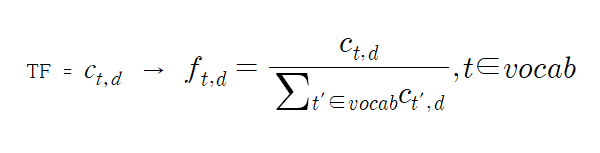

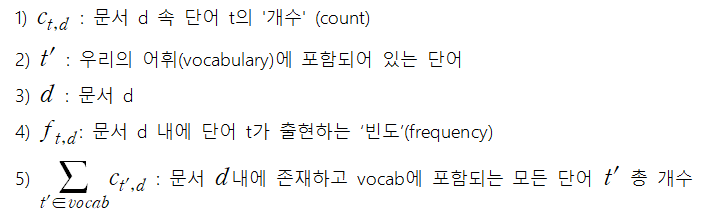

count를 frequency로 변환하는 과정을 포함하여 to_tf 함수 코드를 업데이트하라.

In [ ]:
def to_tf(counter, vocab):
    """
    파라미터
    ----------
    counter : collections.Counter
        한 문서에 대한 The word -> count 매핑.
        
    vocab : Sequence[str]
        우리가 다루는 여러 단어를 정렬한 리스트.
    
    반환 값
    -------
    numpy.ndarray
        문서에 대한 TF descriptor.
        이 TF descriptor는, 주어진 문서 내 vocab에 발생하는 각 용어(term)의 빈도값으로 구성됨."""

# 여기에 코드 작성

이번에는 counts 대신, 문서 당 frequencies 값을 사용하여 이하 네 개의 문서에 대한 TF descriptors를 다시 생성하라.


In [ ]:
doc_1 = "I am a dog"
doc_2 = "I am a cat!"
doc_3 = "I am not a dog?"
doc_4 = "I am not a cat, am I!?!"

# 여기에 코드 작성

## **6. IDF 계산하기**

만약 어떤 용어가 모든 문서에서 거의 같은 비율로 나타난다면, 해당 용어는 서로 다른 문서를 구별해주는 힘이 없게 된다고 볼 수 있다. 이를 달리 표현하자면, 문서 전반적으로는 자주 나타나지 않지만 특정 문서에서 자주 나타나는 용어야말로, 해당 문서를 설명해주는 의미 있는 지표가 되고, 해당 용어를 인코딩 과정에서 중요하게 고려하여야 한다.

우리가 만든 현재의 TF-descriptor에 ‘IDF’를 곱해주면 위 기능을 구현할 수 있다. IDF는 한글로 역문서빈도라 일컬으며, Inverse Document Frequency의 줄임말이다. 아래 수식과 예시를 통해 IDF의 개념을 이해해볼 수 있다.  

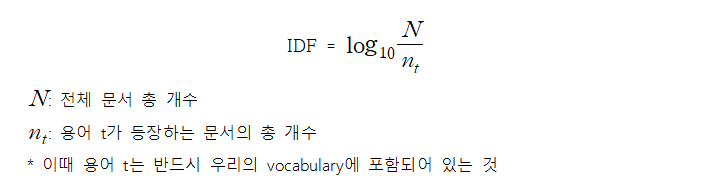

예시로 두 개의 문서 "apple strawberry", "apple blueberry"가 있다고 해보자. 이때 우리의 vocabulary는 순서대로 ‘apple, blueberry, strawberry’가 될 것이다. 그리고 각 단어에 대한 IDF 값의 배열은 $[\log_{10}\frac{2}{2},\log_{10}\frac{2}{1},\log_{10}\frac{2}{1}]$로 표현할 수 있다.  
>이번에는 IDF를 계산하는 함수 ‘to_idf'를 직접 작성해보자. 

>해당 함수는 input값으로 ①순서대로 정렬된 vocabulary와 ②각 문서의 단어 수(Counter 인스턴스 형태)를 포함하는 list를 취한다. output으로는 모든 용어에 대한 IDF 값 배열을 생성해야 한다.  

In [ ]:
def to_idf(vocab, counters):
    """ 
    위 함수는 주어진 vocab과 각 counters(문장의 단어 수)는
    우리의 vocabulary에 포함된 각 용어(term)에 대한 IDF값을 계산해준다.
    
    매개변수
    ----------
    vocab : Sequence[str]
        우리가 관심을 두는 단어에 대한 정렬된 리스트

    counters : Iterable[collections.Counter]
        문서 당 단어 개수를 매핑시킨 것
    
    반환값
    -------
    numpy.ndarray
        'vocab'의 항목과 일치하는 배열로, 각 용어 't'에 대한 IDF를 저장함
                           log10(N / nt)
        `N` : 문서의 개수
        `nt`: 용어 t가 존재하는 문서의 개수
    """

# 여기에 코드 작성


위 함수를 활용하여 아래 두 문서에 대한 IDF 값을 구해보자.   
doc-1: "apple strawberry"  
doc-2: "apple blueberry"  


In [ ]:
doc-1: "apple strawberry"
doc-2: "apple blueberry"

# 여기에 코드 작성

## **7. TF-IDF 계산하기**

앞서 TF에 IDF를 곱함으로써 6번에서 언급한 문제가 해결될 수 있다고 하였다. 이때 TF가 행렬의 형태를 띄기 때문에 둘을 곱하기 위해서는 행렬곱의 조건을 만족해야 하는데, IDF 배열의 모양이 descriptor (N_t,)  각각의 모양과 동일하기 때문에 조건이 충족된다고 볼 수 있다. (이때 N_t은 우리의 vocabulary 내의 용어 개수를 나타낸다.) 즉 IDF 배열과 TF descriptor 간에 행렬곱이 수행될 수 있다!

이와 같이 IDF 벡터와 TF descriptor를 행렬곱하는 가중치 산정법을 ‘TF-IDF'이라 부른다. 우리는 TF-IDF를 통해 기존의 TF descriptor가 갖고 있던 문제를 상쇄시켜주어, 각 문서에서 실질적으로 중요한 용어를 강조할 수 있게 된다. 실제로 ‘TF-IDF'는 문서에 대한 숫자 인코딩 과정에서 매우 인기 있는 가중치 산정법이다.  
아래 $TF,{\rm IDF}_{t,d}$는 문서 d에 있는 용어 t에 대한 TF-IDF 값을 의미한다.

$TF$,${\rm IDF}_{t,d}=f_{t,d}\log_{10}\frac{N}{n_t}$

아래 네 개의 문서에 대한 TF-IDF descriptors을 계산해보자. 이번에도 마찬가지로 vocabulary를 만들 때 불용어는 제외시켜야 한다.

>doc_1 = "Apple cider is delicious."  
doc_2 = "A recipe for apple cider, using apple."  
doc_3 = "Donuts are delicious"  
doc_4 = "Apple cider donuts, anyone? Donuts?"  

결과는 아래와 같아야 한다.


```
>>> vocab
['apple', 'cider', 'delicious', 'donuts', 'recipe']

>>> tfs
array([[ 0.33333333,  0.33333333,  0.33333333,  0.        ,  0.        ],
       [ 0.5       ,  0.25      ,  0.        ,  0.        ,  0.25      ],
       [ 0.        ,  0.        ,  0.5       ,  0.5       ,  0.        ],
       [ 0.25      ,  0.25      ,  0.        ,  0.5       ,  0.        ]])

>>> idf
array([ 0.12493874,  0.12493874,  0.30103   ,  0.30103   ,  0.60205999])

>>> tf_idf
array([[ 0.04164625,  0.04164625,  0.10034333,  0.        ,  0.        ],
       [ 0.06246937,  0.03123468,  0.        ,  0.        ,  0.150515  ],
       [ 0.        ,  0.        ,  0.150515  ,  0.150515  ,  0.        ],
       [ 0.03123468,  0.03123468,  0.        ,  0.150515  ,  0.        ]])
```




In [ ]:
doc_1 = "Apple cider is delicious."
doc_2 = "A recipe for apple cider, using apple."
doc_3 = "Donuts are delicious"
doc_4 = "Apple cider donuts, anyone? Donuts?"

# 여기에 코드 작성


## **8. 유사도 계산하고 TF-IDF 성능 확인하기**

지금까지, TF-IDF 가중치가 적용된 BoW 모델을 기반으로 여러 문서를 동일한 길이의 descriptor 벡터 세트로 조정하는 방법을 배웠다. 이 방법을 통해 우리에게 친숙했던 분석 방식과 머신러닝 기술을 NLP 문제를 해결하는 데 적용해볼 수 있었다. 

이번에는 문서 유사도를 평가해주는 간단한 거리 측정을 진행해볼 것이다. 이때 유클리드 거리를 사용하는 대신, '코사인 유사도'을 사용하여 descriptor 벡터 간의 '중첩' 정도를 측정해볼 것이다.



코사인 유사도 = $cos\theta=$${x•y}\over{∥x∥∥y∥}$  

$\parallel x\parallel$: x의 크기 ($\parallel x\parallel=\sqrt{{x_0}^2+{x_1}^2+\cdots}$라는 식이 성립함.)  
$x•y$ : x, y 두 벡터의 점 곱(Dot product)



이것은 문서의 특징 공간에서 두 개의 descriptor 벡터 (x, y) 사이에 형성된 각도  $\theta$를 측정하는 수식이다. 만약 문서들이 서로 유사하다면 descriptor 벡터들 역시 가깝게 정렬되어 있을 것이다. 이번에는 코사인 유사도를 직접 계산해보도록 하자. 아래는 이차원 배열의 모든 행 사이의 코사인 유사도를 계산하는 코드이다.



```
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tf_idfs)

# set diagonal of `cos_sim` to 0
np.einsum("ii->i", cos_sim)[...] = 0

```
- tf_idfs: TF-IDF 벡터들의 배열 (크기: ($N_{doc}, N_{vocab}$))
- cos_sim: 문서 간 코사인 유사도 (크기: ($N_{doc}, N_{doc}$))
- cos_sim[i, j]: 문서 i와 문서 j 간 코사인 유사도
- 대각 행렬의 경우 각 문서 자기 자신과의 유사도를 나타내기 때문에, 모두 1이 될 것이다. 이에 따라 대각행렬 값을 0으로 설정하면 이러한 사소한 문제를 해결할 수 있다.

아래는 우리가 분석해볼 일곱 개의 문서이다.  




>doc_1 = "Cogworks students learn about artificial intelligence in the form of audio processing, face recognition, and natural language processing."  
doc_2 = "Some people think CogWorks is a intense, but these students are simply passionate about artificial intelligence."  
doc_3 = "Racecar students are learning about autonomous racing."  
doc_4 = "UAV kids are learning about autonomous aerial vehicles!"  
doc_5 = "DC and Marvel Universes have longed challenged each other in the realm of superheroes."  
doc_6 = "Super Heroes produced by DC include Batman, Flash, the Green Lantern and Superman."  
doc_7 = "Super Heroes produced by Marvel include Hulk, Thor, Spiderman, and Wolverine."  


---


불용어를 제거한 vocabulary를 사용하여 7개의 문서에 대한 TF-IDF descriptor를 계산해본 후, 이 문서들의 모든 쌍들 사이의 코사인 유사도를 계산하라. 어떤 문서쌍이 서로 가장 유사한가? 
* np.round(cos_sim, 3)를 사용하여, 이차원 배열의 결과를 소수점 세 자리까지 나타내라.
* matplotlib, ax.imshow() 함수를 사용하면, 행렬 형태의 계산 결과를 시각화할 수 있다.




In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.metrics.pairwise import cosine_similarity

doc_1 = "Cogworks students learn about artificial intelligence in the form of audio processing, face recognition, and natural language processing."
doc_2 = "Some people think CogWorks is a intense, but these students are simply passionate about artificial intelligence."
doc_3 = "Racecar students are learning about autonomous racing."
doc_4 = "UAV kids are learning about autonomous aerial vehicles!"
doc_5 = "DC and Marvel Universes have long challenged each other in the realm of superheroes."
doc_6 = "Super Heroes produced by DC include Batman, Flash, the Green Lantern and Superman."
doc_7 = "Super Heroes produced by Marvel include Hulk, Thor, Spiderman, and Wolverine."

# 1. 각 문서에 대한 tf-idf 벡터를 계산하기
# 2. np.vstack을 사용하여 (N_doc, N_vocab)의 배열 만들기
# 3. (N_doc, N_doc)의 코사인 유사도 행렬 계산하기

# 여기에 코드 작성



In [ ]:
# 1. 코사인 유사도의 대각행렬을 0으로 바꾸기
# 2. 코사인 유사도 행렬을 출력하기 (소수점 세 자리까지 나타낼 것)
# 3. matplotlib을 활용하여 도표와 축으로 시각화하기
#    - `ax.imshow(cos_sim)`을 통해 문서 간 코사인 유사도를 히트맵으로 표현
#    - `ax.set_title(...)`을 통해 도표 제목 생성

# 여기에 코드 작성
